In [4]:
#Plots degenerate ground state S(n=1) - ln(N) as a function of U/t for θ=0, π/4 under periodic boundary conditions
#Plots non-degenerate ground state S(n=1) - ln(N) as a function of U/t under ANTIperiodic boundary conditions
#See Figure 6 of arXiv:1703.10587

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
#Load data files
datamax = np.loadtxt('ntheta_piby4_P20F10n1.dat')
datamin = np.loadtxt('ntheta_0_P20F10n1.dat')
dataAPBC = np.loadtxt('NA20F10n1u.03_100l.dat')
dataTheta = np.loadtxt('thetaP20F10n1u1.dat')
dataThetaShift = np.loadtxt('thetaP20F10n1u1.dat')

#Save to variables 

#Periodic BC's with θ=π/4
vmax=datamax[:,0]                 #Energies (U/t)
smax=datamax[:,3]                 #Von Neumann Entropies for M=20,N=10,n=1 (lattice size, particle #, partition size)

#Periodic BC's with θ=0
vmin=datamin[:,0]                 
smin=datamin[:,3]                 

#Antiperiodic BC's
vAPBC=dataAPBC[:,0]
sAPBC=dataAPBC[:,2]               

Theta=dataTheta[:,0]
sTheta=dataTheta[:,1]              

sThetaShift=dataThetaShift[:,1]
ThetaShift=dataThetaShift[:,0]

for i in range(len(Theta)):
    if i<250:
        ThetaShift[i]= Theta[i]
        sThetaShift[i]= sTheta[i+750]
    if i>249:
        ThetaShift[i]= Theta[i]
        sThetaShift[i]= sTheta[i-250]

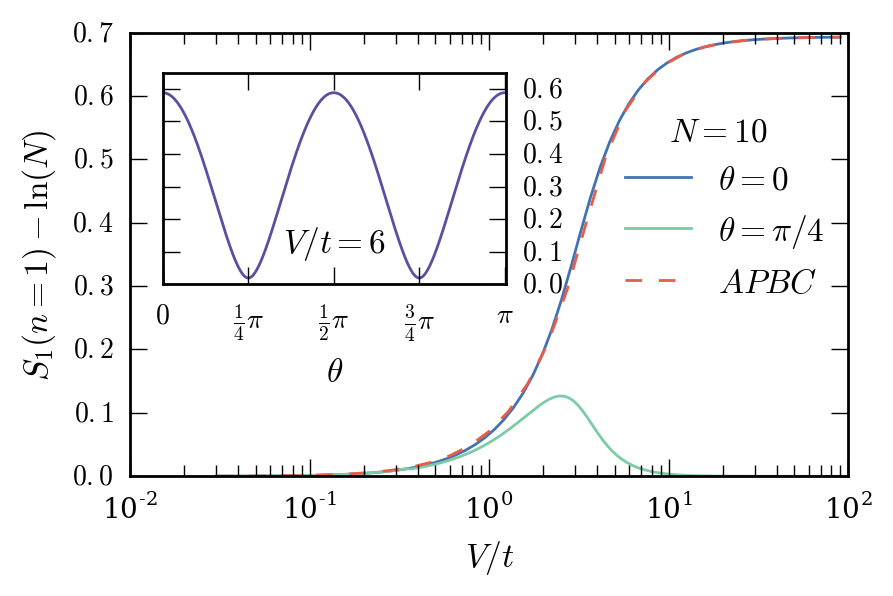

In [6]:
#Replace directory with the location of desired style file
plt.style.reload_library()
with plt.style.context('/Users/ecasiano/anaconda3/pkgs/matplotlib-1.5.3-np111py35_0/lib/python3.5/site-packages/matplotlib/style/IOP_large.mplstyle'):

    #Main Plot
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    plt.xscale('log')
    ax1.set_xlabel(r'$V/t$')
    ax1.set_ylabel(r'$S_1(n=1)-{\rm{ln}}(N)$')
    ax1.plot(vmax,smax,'-', c="#4173b3",mew=1.0,fillstyle='none',label=r'$\theta =0$')
    ax1.plot(vmin,smin,'-', c="#7dcba4",mew=1.0,fillstyle='none',label=r'$\theta =\pi/4$')
    ax1.plot(vAPBC,sAPBC,'--', c="#e95c47",mew=1.0,fillstyle='none',label=r'$APBC$')
    ax1.legend(loc=(0.67,0.37),frameon=False,numpoints=1,ncol=1,title="",shadow=True,fancybox=True)
    
    
with plt.style.context('/Users/ecasiano/anaconda3/pkgs/matplotlib-1.5.3-np111py35_0/lib/python3.5/site-packages/matplotlib/style/IOP_large.mplstyle'):
    
    #Inset
    left, bottom, width, height = [0.16, 0.46, 0.37,0.37 ]
    ax2 = fig1.add_axes([left, bottom, width, height])
    ax2.set_xlabel(r'$\theta$')
    ax2.plot(ThetaShift,sThetaShift,'-', c="#5e4ea2",mew=1.0,fillstyle='none')
    ax2.set_xlim(0,3.15)
    ax2.set_ylim(0,0.65)
    ax2.tick_params(
       axis='both',               # changes apply to the x-axis
       which='both',              # both major and minor ticks are affected
       left='on',                 # ticks along the bottom edge are off
       top='on',                  # ticks along the top edge are off
       labelright='on',           # labels along the bottom edge are off
       labelleft='off')           # labels along the bottom edge are off
    ax2.set_xticks([0.,.25*np.pi,.5*np.pi,.75*np.pi, np.pi])
    ax2.set_xticklabels(["$0$", r"$\frac{1}{4}\pi$",r"$\frac{1}{2}\pi$",r"$\frac{3}{4}\pi$",r"$\pi$"])
    ax2.text(1.1, .1,r"$V/t=6$")
    ax1.text(10, .53,r"$N=10$")
    plt.savefig('degeneracyEffect.pdf')
    plt.savefig('degeneracyEffect.png')